In [ ]:
# Physiochemical Properties of Protein Tertiary Structure
# Reading data from CASP.csv file
import pandas as pd
dataset=pd.read_csv('/content/CASP.csv')

In [ ]:
# It consists of 45730 rows and 10 columns
dataset.shape

(45730, 10)

In [ ]:
dataset.isna().sum()
dataset.head()

RMSD        F1       F2       F3        F4            F5        F6  \
0  17.284  13558.30  4305.35  0.31754  162.1730  1.872791e+06  215.3590   
1   6.021   6191.96  1623.16  0.26213   53.3894  8.034467e+05   87.2024   
2   9.275   7725.98  1726.28  0.22343   67.2887  1.075648e+06   81.7913   
3  15.851   8424.58  2368.25  0.28111   67.8325  1.210472e+06  109.4390   
4   7.962   7460.84  1736.94  0.23280   52.4123  1.021020e+06   94.5234   

        F7   F8       F9  
0  4287.87  102  27.0302  
1  3328.91   39  38.5468  
2  2981.04   29  38.8119  
3  3248.22   70  39.0651  
4  2814.42   41  39.9147

In [ ]:
dataset=dataset.dropna()

In [ ]:
dataset.shape

(45730, 10)

In [ ]:
# Performing Label Encoder ------ used to transform numerical data from categorical data.
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset['F5']=le.fit_transform(dataset['F5'])
dataset.head()

RMSD        F1       F2       F3        F4     F5        F6       F7  \
0  17.284  13558.30  4305.35  0.31754  162.1730  34050  215.3590  4287.87   
1   6.021   6191.96  1623.16  0.26213   53.3894   5264   87.2024  3328.91   
2   9.275   7725.98  1726.28  0.22343   67.2887  14830   81.7913  2981.04   
3  15.851   8424.58  2368.25  0.28111   67.8325  19891  109.4390  3248.22   
4   7.962   7460.84  1736.94  0.23280   52.4123  12817   94.5234  2814.42   

    F8       F9  
0  102  27.0302  
1   39  38.5468  
2   29  38.8119  
3   70  39.0651  
4   41  39.9147

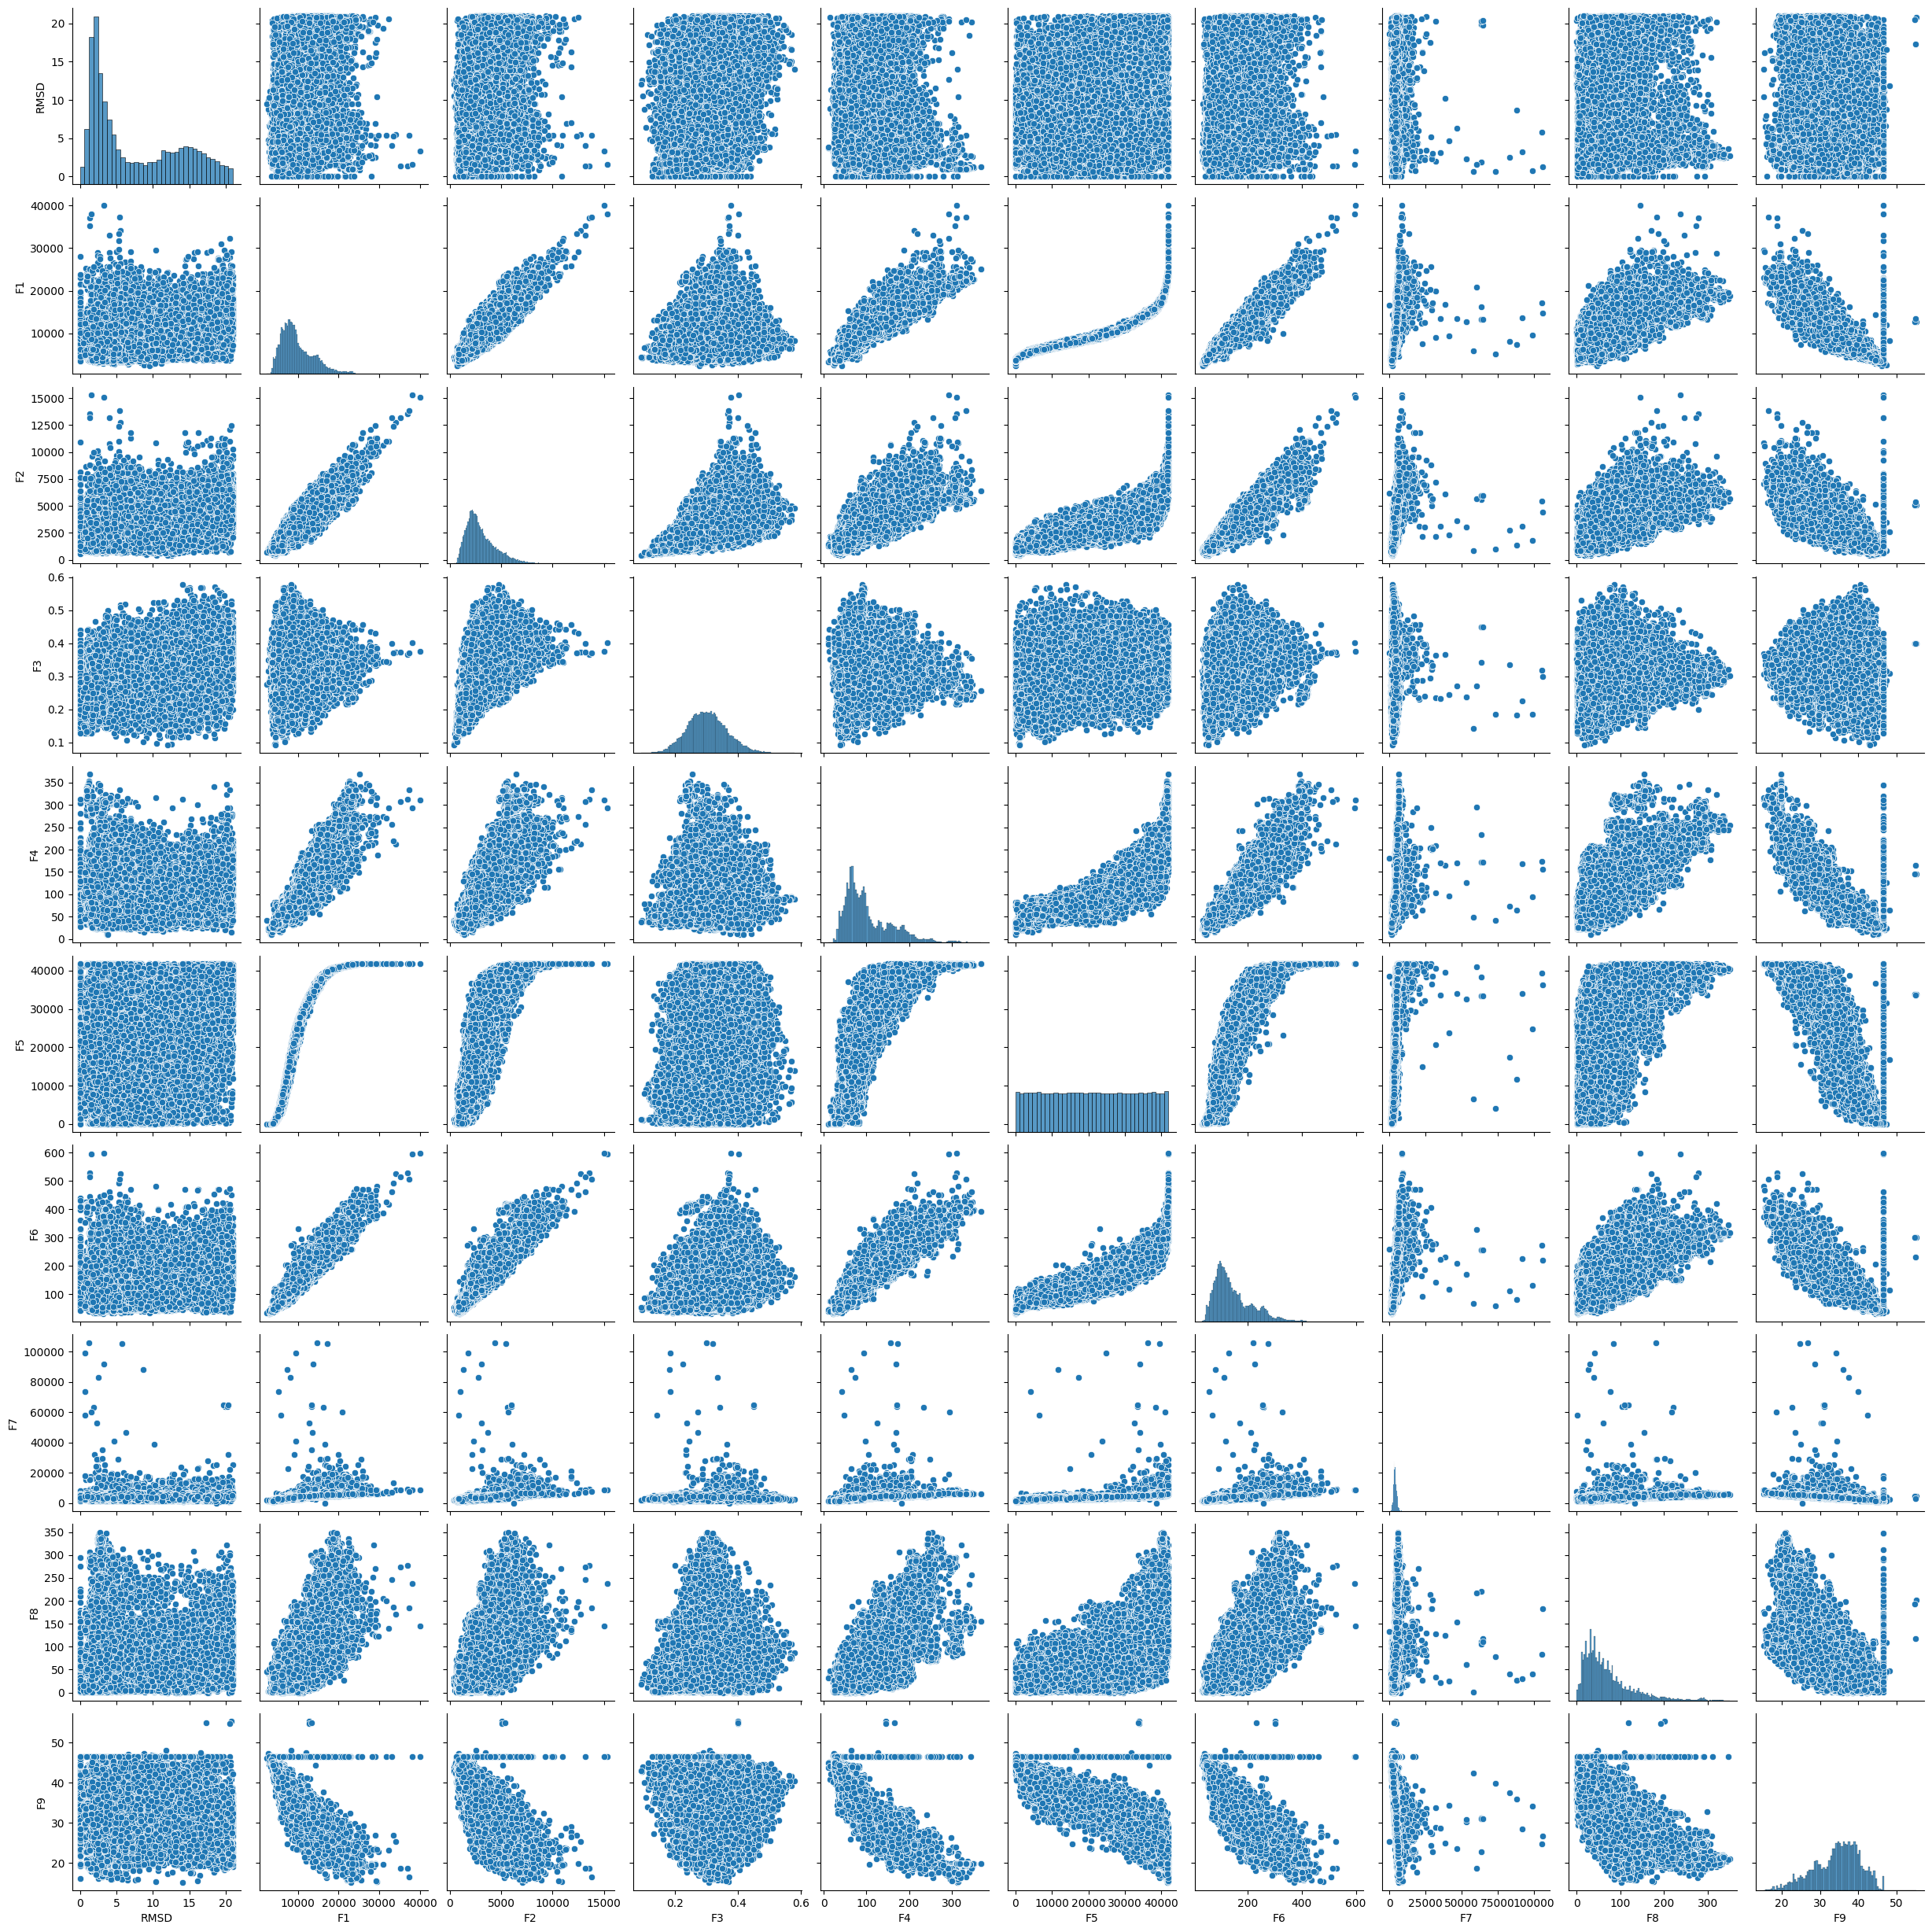

In [ ]:
# Pair Plot ------for visualizing relationship and identifying patterns
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(dataset)
plt.show()

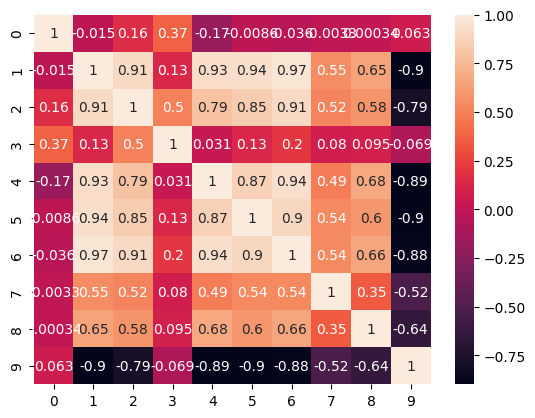

In [ ]:
# Heat Map ------ is used for feature correlation and also for hyperparameter tuning to visualize performance metrics
import numpy as np
corr=np.corrcoef(dataset.values.T)
hm=sns.heatmap(corr, annot=True)
plt.show()

In [ ]:
dataset=dataset.drop(columns=['F3','F9'])     # less correlated, darker in color

In [ ]:
dataset.shape

(45730, 8)

In [ ]:
# Stting target and features
target=dataset['F8']
features=dataset.drop(columns=['F8'])
print(features.head())

     RMSD        F1       F2        F4     F5        F6       F7
0  17.284  13558.30  4305.35  162.1730  34050  215.3590  4287.87
1   6.021   6191.96  1623.16   53.3894   5264   87.2024  3328.91
2   9.275   7725.98  1726.28   67.2887  14830   81.7913  2981.04
3  15.851   8424.58  2368.25   67.8325  19891  109.4390  3248.22
4   7.962   7460.84  1736.94   52.4123  12817   94.5234  2814.42


In [ ]:
# Splitting the data into train and test------------
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest=train_test_split(features, target, test_size=0.15)
print(xtrain.shape)
print(xtest.shape)

(38870, 7)
(6860, 7)


In [ ]:
print(xtrain.describe())

               RMSD            F1            F2            F4            F5  \
count  38870.000000  38870.000000  38870.000000  38870.000000  38870.000000   
mean       7.736428   9883.514142   3022.224722    103.594638  20934.221173   
std        6.117186   4070.082201   1468.480654     55.515725  12135.781212   
min        0.000000   2392.050000    403.500000     11.096100      0.000000   
25%        2.300000   6931.645000   1980.047500     63.563900  10383.250000   
50%        5.001500   8914.675000   2675.955000     87.864400  20956.500000   
75%       13.364750  12143.525000   3796.325000    133.806750  31458.500000   
max       20.999000  40034.900000  15312.000000    369.317000  41867.000000   

                 F6             F7  
count  38870.000000   38870.000000  
mean     145.849607    3993.168396  
std       70.203433    1998.928764  
min       31.970400       0.000000  
25%       94.759725    3164.767500  
50%      126.415000    3842.015000  
75%      182.202250    4645.1

In [ ]:
# Using StandardScaler-------------to have a similar scale, or to standardize the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain_sc=sc.fit_transform(xtrain)
xtest_sc=sc.transform(xtest)

In [ ]:
# Performing Linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain_sc, ytrain)

LinearRegression()

In [ ]:
lr_train_results=lr.predict(xtrain_sc)
lr_test_results=lr.predict(xtest_sc)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print("Training Results:")
print("MSE:", mean_squared_error(ytrain, lr_train_results))
print("R2 Score:", r2_score(ytrain, lr_train_results))

Training Results:
MSE: 1678.864928585478
R2 Score: 0.47464527154534375


In [ ]:
print("Testing Results:")
print("MSE:", mean_squared_error(ytest, lr_test_results))
print("R2 Score:", r2_score(ytest, lr_test_results))

Testing Results:
MSE: 1644.9203531949247
R2 Score: 0.48060896367067296


In [ ]:
from sklearn.linear_model import RANSACRegressor

In [ ]:
ransac=RANSACRegressor(LinearRegression(), min_samples=50, residual_threshold=0.5)
ransac.fit(xtrain_sc, ytrain)

RANSACRegressor(estimator=LinearRegression(), min_samples=50,
                residual_threshold=0.5)

In [ ]:
print(ransac.inlier_mask_)

[False False False ... False False False]


In [ ]:
print(np.sum(ransac.inlier_mask_==True))

628


In [ ]:
outlier=np.logical_not(ransac.inlier_mask_)
print(outlier)

[ True  True  True ...  True  True  True]


In [ ]:
ransac_train_results=ransac.predict(xtrain_sc)
ransac_test_results=ransac.predict(xtest_sc)
print("Training Results:")
print("MSE:", mean_squared_error(ytrain, ransac_train_results))
print("R2 Score:", r2_score(ytrain, ransac_train_results))
print("Testing Results:")
print("MSE:", mean_squared_error(ytest, ransac_test_results))
print("R2 Score:", r2_score(ytest, ransac_test_results))

Training Results:
MSE: 1862.2588037138776
R2 Score: 0.4172571887830788
Testing Results:
MSE: 1826.7234240898938
R2 Score: 0.4232038223113438


In [ ]:
input=dataset['F2']

In [ ]:
input.shape

(45730,)

In [ ]:
target.shape

(45730,)

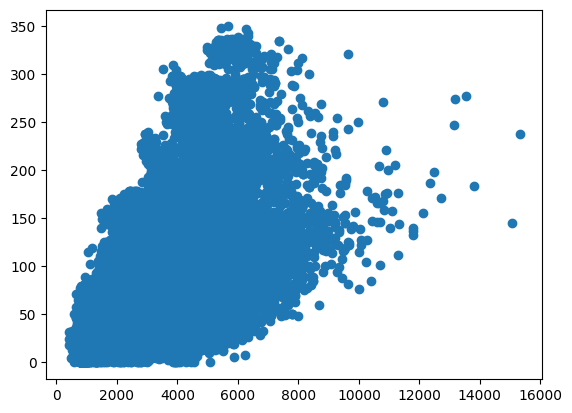

In [ ]:
plt.scatter(input, target)
plt.show()

In [ ]:
trainx, testx, trainy,testy=train_test_split(input, target, test_size=0.15)

In [ ]:
trainx=np.array(trainx).reshape(-1,1)
testx=np.array(testx).reshape(-1,1)

In [ ]:
lr1=LinearRegression()
lr1.fit(trainx, trainy)

LinearRegression()

In [ ]:
lr1_train=lr1.predict(trainx)
lr1_test=lr1.predict(testx)

In [ ]:
print("Training Results:")
print("MSE:", mean_squared_error(trainy, lr1_train))
print("R2 Score:", r2_score(trainy, lr1_train))
print("Testing Results:")
print("MSE:", mean_squared_error(testy, lr1_test))
print("R2 Score:", r2_score(testy, lr1_test))

Training Results:
MSE: 2102.356434078443
R2 Score: 0.3405782188448977
Testing Results:
MSE: 2100.5850221440987
R2 Score: 0.3455752444682889


[]

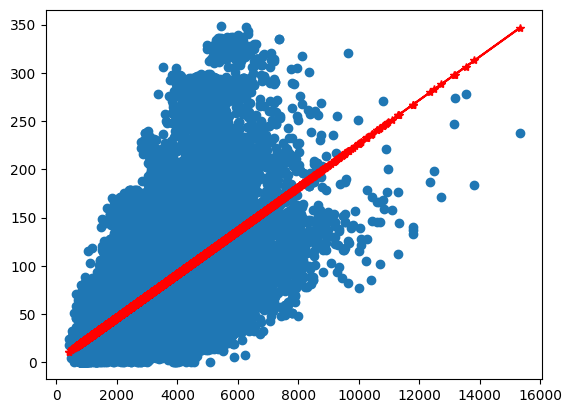

In [ ]:
sorted_input=np.sort(trainx)
plt.scatter(trainx, trainy)
plt.plot(trainx, lr1.predict(trainx), c='red', marker='*')
plt.plot()

In [ ]:
ransac1=RANSACRegressor(LinearRegression(), min_samples=50, residual_threshold=0.5)
ransac1.fit(trainx, trainy)

RANSACRegressor(estimator=LinearRegression(), min_samples=50,
                residual_threshold=0.5)

In [ ]:
ransac1_train_results=ransac1.predict(trainx)
ransac1_test_results=ransac1.predict(testx)
print("Training Results:")
print("MSE:", mean_squared_error(ransac1_train_results, trainy))
print("R2 Score:", r2_score(ransac1_train_results, trainy))
print("Testing Results:")
print("MSE:", mean_squared_error(ransac1_test_results, testy))
print("R2 Score:", r2_score(ransac1_test_results, testy))

Training Results:
MSE: 2176.463378267312
R2 Score: -0.5646659265508138
Testing Results:
MSE: 2136.5179831987384
R2 Score: -0.5178618456125235


In [ ]:
print(np.sum(ransac1.inlier_mask_==True))

535


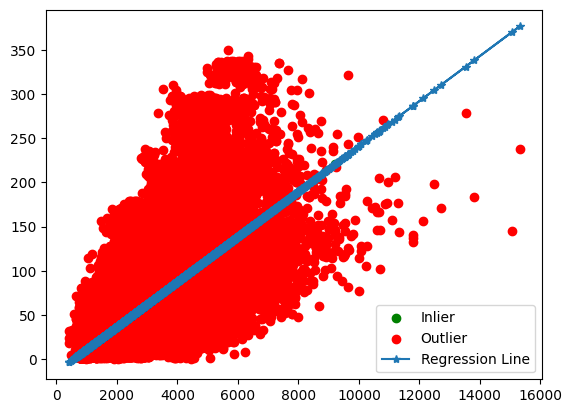

In [ ]:
inlier=ransac1.inlier_mask_
outlier=np.logical_not(inlier)
plt.scatter(trainx[inlier], trainy[inlier], c='green', label="Inlier")
plt.scatter(trainx[outlier], trainy[outlier], c='red', label="Outlier")
plt.plot(trainx, ransac1.predict(trainx), marker='*', label="Regression Line")
plt.legend()
plt.show()

Polynomial **Regression**


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly=PolynomialFeatures(degree=2)
poly_2_train=poly.fit_transform(trainx)
poly_2_test=poly.transform(testx)

In [ ]:
poly_2_train.shape

(38870, 3)

In [ ]:
lr_poly=LinearRegression()
lr_poly.fit(poly_2_train, trainy)

LinearRegression()

In [ ]:
poly2_train_results=lr_poly.predict(poly_2_train)
poly2_test_results=lr_poly.predict(poly_2_test)
print("Training Results:")
print("MSE:", mean_squared_error(poly2_train_results, trainy))
print("R2 Score:", r2_score(poly2_train_results, trainy))
print("Testing Results:")
print("MSE:", mean_squared_error(poly2_test_results, testy))
print("R2 Score:", r2_score(poly2_test_results, testy))

Training Results:
MSE: 2096.5798177644756
R2 Score: -0.9001425672227668
Testing Results:
MSE: 2059.015669196549
R2 Score: -0.8597948302687535


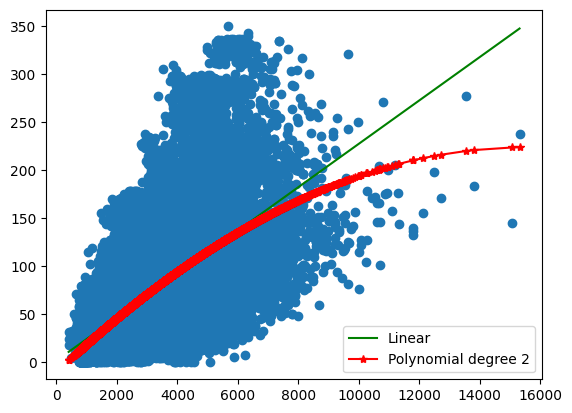

In [ ]:
input=sorted(trainx)
plt.scatter(trainx, trainy)
plt.plot(input, lr1.predict(input), c='green', label="Linear")
plt.plot(input, lr_poly.predict(poly.fit_transform(input)), c='red', marker='*', label="Polynomial degree 2")
plt.legend()
plt.show()

Regularized Methods of Regression

In [ ]:
from sklearn.linear_model import Lasso
l1=Lasso()
l1.fit(trainx, trainy)
l1_train_results=l1.predict(trainx)
l1_test_results=l1.predict(testx)
print("Training Results:")
print("MSE:",mean_squared_error(l1_train_results, trainy))
print("R2 Score:", r2_score(l1_train_results, trainy))
print("Testing Results:")
print("MSE:", mean_squared_error(l1_test_results, testy))
print("R2 Score:", r2_score(l1_test_results, testy))

Training Results:
MSE: 2107.3736980953586
R2 Score: -0.9288734321443206
Testing Results:
MSE: 2072.1982001177744
R2 Score: -0.8743422660630127


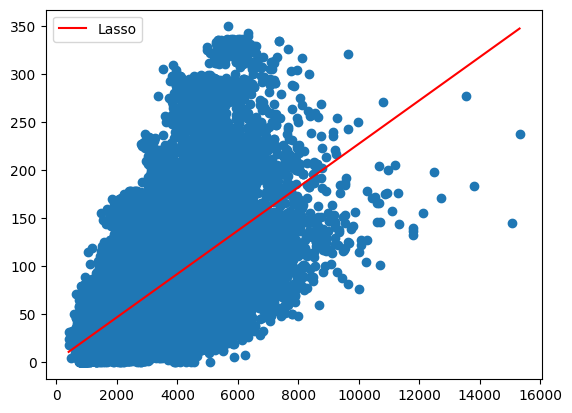

In [ ]:
plt.scatter(trainx, trainy)
plt.plot(input, l1.predict(input), c='red', label="Lasso")
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import Ridge
l2=Ridge()
l2.fit(trainx, trainy)
l2_train_results=l2.predict(trainx)
l2_test_results=l2.predict(testx)
print("Training Results:")
print("MSE:", mean_squared_error(l2_train_results, trainy))
print("R2 Score: ", r2_score(l2_train_results, trainy))
print("Testing Results:")
print("MSE:", mean_squared_error(l2_test_results, testy))
print("R2 Score:", r2_score(l2_test_results, testy))

Training Results:
MSE: 2107.373697628129
R2 Score:  -0.9287936567886239
Testing Results:
MSE: 2072.198918517413
R2 Score: -0.8742653962304523


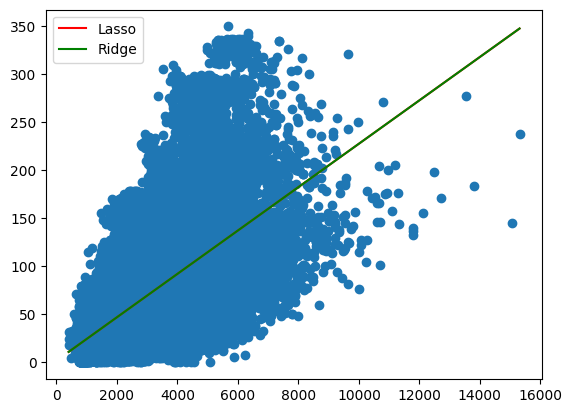

In [ ]:
plt.scatter(trainx, trainy)
plt.plot(input, l1.predict(input), c='red', label="Lasso")
plt.plot(input, l2.predict(input), c="green", label="Ridge")
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import ElasticNet
l12=ElasticNet()
l12.fit(trainx, trainy)
l12_train_results=l12.predict(trainx)
l12_test_results=l12.predict(testx)
print("Training Results:")
print("MSE:", mean_squared_error(l12_train_results, trainy))
print("R2 Score:",r2_score(l12_train_results, trainy))
print("Testing Results:")
print("MSE:", mean_squared_error(l12_test_results, testy))
print("R2 Score:",r2_score(l12_test_results, testy))


Training Results:
MSE: 2107.373697750274
R2 Score: -0.9288344449314934
Testing Results:
MSE: 2072.1985510839395
R2 Score: -0.8743046988133858


DecisionTree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(trainx, trainy)
dt_train_results=dt.predict(trainx)
dt_test_results=dt.predict(testx)
print("Training Results:")
print("MSE:", mean_squared_error(dt_train_results, trainy))
print("R2 Score:", r2_score(dt_train_results, trainy))
print("Testing Results:")
print("MSE:", mean_squared_error(dt_test_results, testy))
print("R2 Score:", r2_score(dt_test_results, testy))

Training Results:
MSE: 62.60086374606442
R2 Score: 0.9800466381795565
Testing Results:
MSE: 3400.7505749695893
R2 Score: -0.12474178571809968


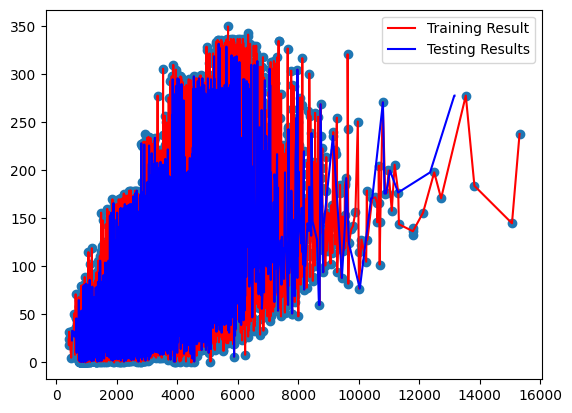

In [ ]:
input_test=sorted(testx)
plt.scatter(trainx, trainy)
plt.plot(input, dt.predict(input), c='red', label="Training Result")
plt.plot(input_test, dt.predict(input_test), c='blue', label="Testing Results")
plt.legend()
plt.show()


In [ ]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(trainx, trainy)
svr_train_results=svr.predict(trainx)
svr_test_results=svr.predict(testx)
print("Training Results:")
print("MSE:", mean_squared_error(svr_train_results, trainy))
print("R2 Score:",r2_score(svr_train_results, trainy))
print("Testing Results:")
print("MSE:", mean_squared_error(svr_test_results, testy))
print("R2 Score:", r2_score(svr_test_results, testy))

Training Results:
MSE: 2152.495234451215
R2 Score: -1.420796130212958
Testing Results:
MSE: 2103.682369692623
R2 Score: -1.4283964934868978


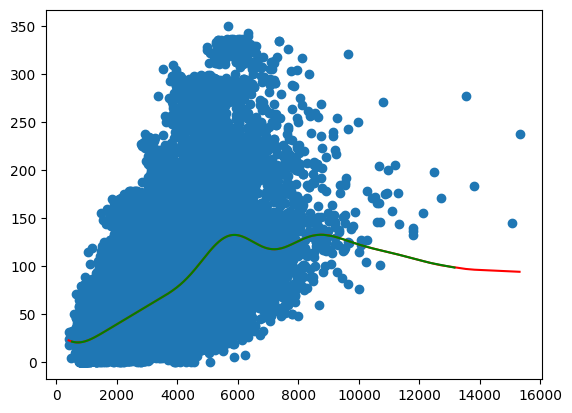

In [ ]:
plt.scatter(trainx, trainy)
plt.plot(input, svr.predict(input), c='red')
plt.plot(input_test, svr.predict(input_test), c='green')
plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# # First, we need to extract the data for the bar graph.
# labels = ['Linear Regression', 'RANSAC', 'Lasso', 'Ridge', 'ElasticNet']
# mse_train = [mean_squared_error(ytrain, lr1_train), mean_squared_error(trainy, ransac_train_results), mean_squared_error(trainy, l1_train_results), mean_squared_error(trainy, l2_train_results), mean_squared_error(trainy,l12_train_results)]
# mse_test = [mean_squared_error(ytest, lr1_test), mean_squared_error(testy, ransac_test_results), mean_squared_error(testy, l1_test_results), mean_squared_error(testy, l2_test_results), mean_squared_error(testy, l12_test_results)]

# # Now, we can create the bar graph.
# x = np.arange(len(labels))  # Positions of the bars
# width = 0.35  # Width of a bar

# fig, ax = plt.subplots()

# rects1 = ax.bar(x - width/2, mse_train, width, label='Train MSE', color='green')
# rects2 = ax.bar(x + width/2, mse_test, width, label='Test MSE', color='blue')

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Mean Squared Error')
# ax.set_title('Comparison of Regression Models')
# ax.set_xticks(x)
# ax.set_xticklabels(labels)
# ax.legend()

# plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# # First, we need to extract the data for the bar graph.
# labels = ['Linear Regression', 'RANSAC', 'Lasso', 'Ridge', 'ElasticNet']
# mse_train = [r2_score(ytrain, lr1_train), r2_score(trainy, ransac_train_results), r2_score(trainy, l1_train_results), r2_score(trainy, l2_train_results), r2_score(trainy,l12_train_results)]
# mse_test = [r2_score(ytest, lr1_test), r2_score(testy, ransac_test_results), r2_score(testy, l1_test_results), r2_score(testy, l2_test_results), r2_score(testy, l12_test_results)]

# # Now, we can create the bar graph.
# x = np.arange(len(labels))  # Positions of the bars
# width = 0.35  # Width of a bar

# fig, ax = plt.subplots()

# rects1 = ax.bar(x - width/2, mse_train, width, label='Train r2_score', color='green')
# rects2 = ax.bar(x + width/2, mse_test, width, label='Test r2_score', color='blue')

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('R2_Score')
# ax.set_title('Comparison of Regression Models')
# ax.set_xticks(x)
# ax.set_xticklabels(labels)
# ax.legend()

# plt.show()

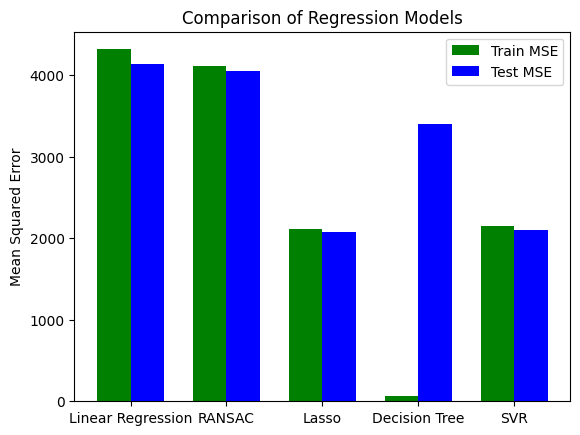

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# First, we need to extract the data for the bar graph.
labels = ['Linear Regression', 'RANSAC', 'Lasso', 'Decision Tree', 'SVR']
mse_train = [mean_squared_error(ytrain, lr1_train), mean_squared_error(trainy, ransac_train_results), mean_squared_error(trainy, l1_train_results), mean_squared_error(dt_train_results, trainy),mean_squared_error(svr_train_results, trainy)]
mse_test = [mean_squared_error(ytest, lr1_test), mean_squared_error(testy, ransac_test_results), mean_squared_error(testy, l1_test_results),mean_squared_error(dt_test_results, testy), mean_squared_error(svr_test_results, testy)]

# Now, we can create the bar graph.
x = np.arange(len(labels))  # Positions of the bars
width = 0.35  # Width of a bar

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, mse_train, width, label='Train MSE', color='green')
rects2 = ax.bar(x + width/2, mse_test, width, label='Test MSE', color='blue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean Squared Error')
ax.set_title('Comparison of Regression Models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

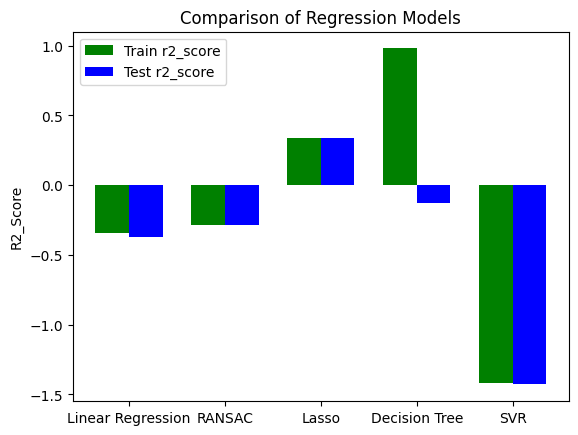

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# First, we need to extract the data for the bar graph.
labels = ['Linear Regression', 'RANSAC', 'Lasso', 'Decision Tree', 'SVR']
mse_train = [r2_score(ytrain, lr1_train), r2_score(trainy, ransac_train_results), r2_score(trainy, l1_train_results),r2_score(dt_train_results, trainy),r2_score(svr_train_results, trainy)]
mse_test = [r2_score(ytest, lr1_test), r2_score(testy, ransac_test_results), r2_score(testy, l1_test_results),r2_score(dt_test_results, testy),r2_score(svr_test_results, testy)]

# Now, we can create the bar graph.
x = np.arange(len(labels))  # Positions of the bars
width = 0.35  # Width of a bar

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, mse_train, width, label='Train r2_score', color='green')
rects2 = ax.bar(x + width/2, mse_test, width, label='Test r2_score', color='blue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('R2_Score')
ax.set_title('Comparison of Regression Models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso

# Define the Lasso regression model
lasso = Lasso()

# Define the hyperparameters grid
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],  # Regularization strength
    'normalize': [True, False]  # Whether to normalize the data
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(xtrain, ytrain)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on training and test data
train_predictions = best_model.predict(xtrain)
test_predictions = best_model.predict(xtest)

# Evaluate the model's performance
print("Training Results:")
print("MSE:", mean_squared_error(train_predictions, ytrain))
print("R2 Score:", r2_score(train_predictions, ytrain))

print("Testing Results:")
print("MSE:", mean_squared_error(test_predictions, ytest))
print("R2 Score:", r2_score(test_predictions, ytest))